In [1]:
import pandas as pd 

data = pd.read_csv("data.csv")

# Exploring the dataset 
### 1. Check if there is any null value |

In [2]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [3]:
data = data.drop("Unnamed: 32",axis = 1)

### 2. Check the data types of all columns

In [4]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

<font size=3> It seems that all variables except our target are all numerical (float), Nice !!  </font>

### 3. Remove unwanted column. <br>
<font>
    Id column is not useful for our machine learning model. So, remove it.
</font> 

In [5]:
data = data.drop("id",axis =1)

### 4. Remove columns (predicting variables) that have high correlation with each other. (remove only one of the two).

In [6]:
%matplotlib inline 

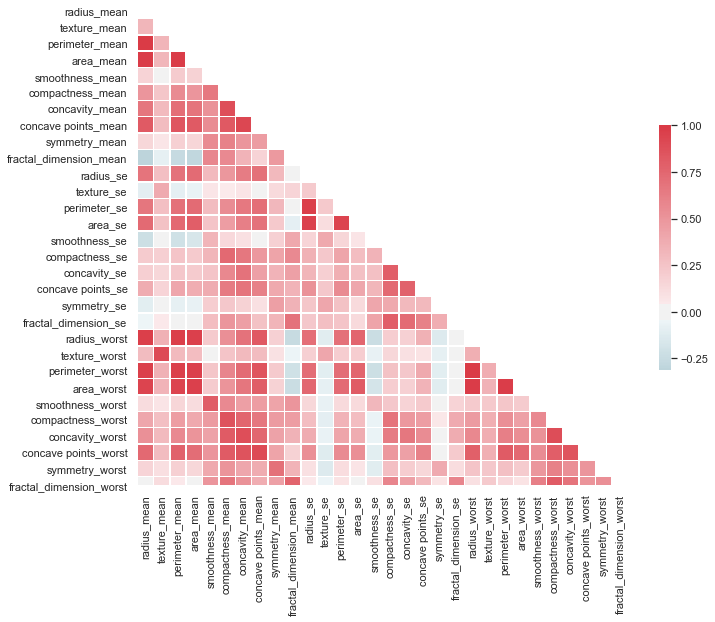

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<font size=3> 
    Columns that have high correlation with another columns will be removed
</font> 


In [8]:
to_drop = ["perimeter_mean","area_mean","radius_worst","perimeter_worst","area_worst","perimeter_se","area_se","concavity_mean",
           "concave points_mean","texture_worst","concavity_se","concave points_se","fractal_dimension_se","concavity_worst",
           "concave points_worst"]
data = data.drop(to_drop,axis=1)

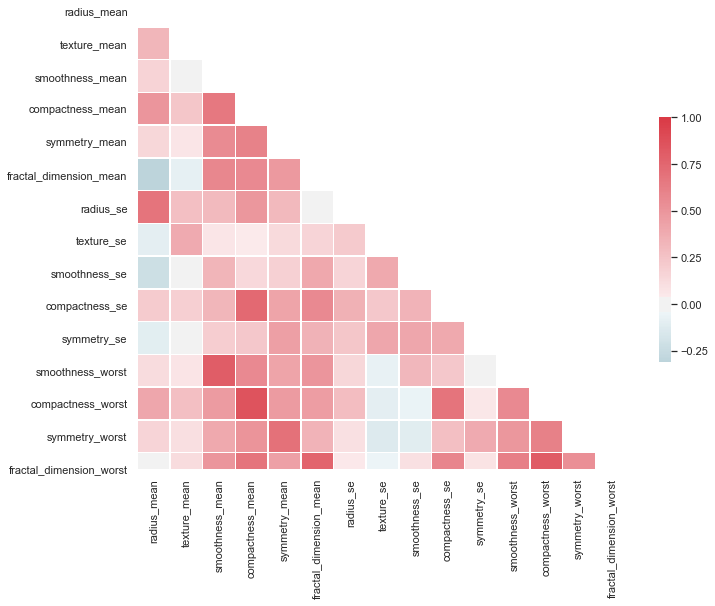

In [9]:
sns.set(style="white")

corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
data

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.16220,0.66560,0.4601,0.11890
1,M,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.12380,0.18660,0.2750,0.08902
2,M,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.14440,0.42450,0.3613,0.08758
3,M,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.20980,0.86630,0.6638,0.17300
4,M,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.13740,0.20500,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.01114,0.14100,0.21130,0.2060,0.07115
565,M,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.01898,0.11660,0.19220,0.2572,0.06637
566,M,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.01318,0.11390,0.30940,0.2218,0.07820
567,M,20.60,29.33,0.11780,0.27700,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.02324,0.16500,0.86810,0.4087,0.12400


### 5. Normalise all numerical columns to range of 0 and 1

In [11]:
target = data["diagnosis"]
data = data.drop("diagnosis",axis=1)
data = data /data.max()
data = pd.concat([data,target],axis=1)

In [12]:
data

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,0.639986,0.264257,0.724602,0.803706,0.795724,0.807779,0.381135,0.185322,0.205557,0.362186,0.380367,0.728661,0.629112,0.693130,0.573012,M
1,0.731768,0.452393,0.518605,0.227678,0.596053,0.581589,0.189175,0.150235,0.167845,0.096603,0.175934,0.556155,0.176371,0.414281,0.429012,M
2,0.700462,0.540988,0.670747,0.462942,0.680592,0.615661,0.259520,0.161085,0.197559,0.295864,0.284991,0.648697,0.401229,0.544290,0.422072,M
3,0.406261,0.518839,0.872093,0.821946,0.854276,1.000000,0.172503,0.236643,0.292644,0.550812,0.755288,0.942498,0.818809,1.000000,0.833735,M
4,0.721807,0.365071,0.613831,0.384482,0.595066,0.603756,0.263557,0.159939,0.369097,0.181758,0.222419,0.617251,0.193762,0.356131,0.370024,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.766987,0.570010,0.679315,0.335553,0.567763,0.577073,0.409328,0.257114,0.330871,0.213516,0.141102,0.633423,0.199716,0.310334,0.342892,M
565,0.716115,0.719196,0.598531,0.299363,0.576316,0.567837,0.266446,0.504197,0.185320,0.178951,0.240405,0.523810,0.181664,0.387466,0.319855,M
566,0.590537,0.714868,0.517442,0.296178,0.523026,0.579639,0.158858,0.220061,0.189624,0.275554,0.166941,0.511680,0.292439,0.334137,0.376867,M
567,0.732835,0.746690,0.720930,0.801969,0.788487,0.720033,0.252698,0.326510,0.209509,0.454801,0.294364,0.741240,0.820510,0.615697,0.597590,M


### 6. Convert the categorical target variables to numerical 

In [13]:
my_dict = {
    "diagnosis":{
        "M":1,
        "B":0
    }
}

data = data.replace(my_dict)

# Building predictive model

### 1. Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [15]:
lr = LogisticRegression(solver='lbfgs')

features = data.drop("diagnosis",axis=1).copy()
target = data["diagnosis"].copy()

prediction = cross_val_predict(lr,features,target,cv=5)
prediction = pd.Series(prediction)
prediction = prediction.rename("prediction")

In [16]:
logistic_pred = pd.crosstab(target,prediction)

### 2. Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

<font size=3> Find the best parameter for each tree <font>

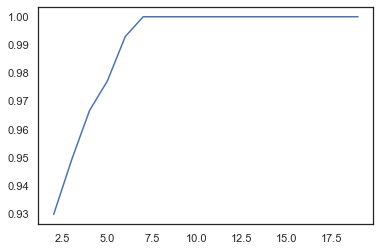

In [18]:
from sklearn.tree import DecisionTreeClassifier

x = [n for n in range(2,20)]
y = []
for i in range(2,20):
    tf = DecisionTreeClassifier(max_depth = i)
    tf.fit(features,target)
    pred = tf.predict(features)
    acc = accuracy_score(target,pred)
    y.append(acc)
    
plt.plot(x,y)

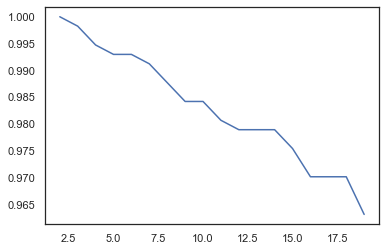

In [19]:
x = [n for n in range(2,20)]
y = []
for i in range(2,20):
    tf = DecisionTreeClassifier(min_samples_split = i)
    tf.fit(features,target)
    pred = tf.predict(features)
    acc = accuracy_score(target,pred)
    y.append(acc)
    
plt.plot(x,y)

In [20]:
clf = RandomForestClassifier(n_estimators=10,random_state=1,min_samples_leaf=2)
prediction = cross_val_predict(clf,features,target,cv=5)
prediction = pd.Series(prediction)
prediction = prediction.rename("prediction")
forest_pred = pd.crosstab(target,prediction)

In [21]:
logistic_pred

prediction,0,1
diagnosis,,
0,351,6
1,37,175


In [22]:
forest_pred

prediction,0,1
diagnosis,,
0,341,16
1,16,196


<font size=3> From the confusion matrix generated above, random forest is the better choice of predicting whether a patient has malignant or benign breast cancer. 

This is because the random forest model has lower false negative and higher true positive (malignant) rate, which is better because at the end, it is better to have correctly diagnosed malignant tumour. </font> 